In [1]:
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import numpy as np
from nltk.corpus import stopwords
import string
import emoji
import string
from datetime import timedelta
import matplotlib.dates as mdates

In [2]:
dir_="C:\\Users\\Alex\\Personal-Code\\ACE_592_Dating_Sim\\Wrangled_Data\\"

In [3]:
#reads the csv files into memory for each dating app.
#Data has already been cleaed and all three files share the same columns
dfT = pd.read_csv(dir_ + "clean_Tinder.csv")
dfB = pd.read_csv(dir_ + "clean_Bumble.csv")
dfH = pd.read_csv(dir_ + "clean_Hinge.csv")

In [4]:
dfH.shape

(54086, 10)

### Lifetime App Star Ratings

In [5]:
#converts the time_stamp and date columns to datetime64 types
def to_datetime(df):
    df['date'] = pd.to_datetime(df.date)
    df['time_stamp'] = pd.to_datetime(df['time_stamp'])
    df_data = df.loc[df['score'] != 0]
    return df_data

dfT = to_datetime(dfT)
dfB = to_datetime(dfB)
dfH = to_datetime(dfH)

dfT = dfT[['userName', 'clean_text', 'score', 'thumbs', 'date', 'time_stamp', 'reply_status', 'reply_content']]
dfB = dfB[['userName', 'clean_text', 'score', 'thumbs', 'date', 'time_stamp', 'reply_status', 'reply_content']]
dfH = dfH[['userName', 'clean_text', 'score', 'thumbs', 'date', 'time_stamp', 'reply_status', 'reply_content']]

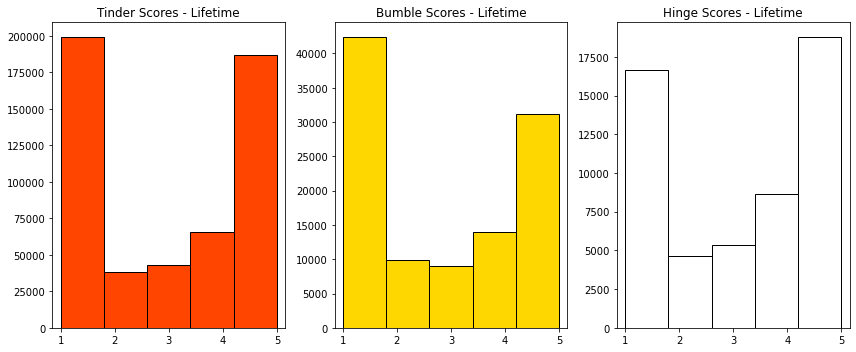

In [24]:
#plots the overall scores of the three apps over their lifespans
fig, axs = plt.subplots(1, 3, tight_layout=True, sharey=False, 
                        figsize = (12,5))
                       #title = 'Star Ratings for Tinder, Bumble, and Hinge')

# ax.set_xlim(1,5)
# ax.set_xticks([1,2,3,4,5])

axs[0].hist(dfT['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[0].title.set_text('Tinder Scores - Lifetime')
axs[0].set_xlim(0.85,5.15)
axs[0].set_xticks([1,2,3,4,5])

axs[1].hist(dfB['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[1].title.set_text('Bumble Scores - Lifetime')
axs[1].set_xlim(0.85,5.15)
axs[1].set_xticks([1,2,3,4,5])

axs[2].hist(dfH['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[2].title.set_text('Hinge Scores - Lifetime')
axs[2].set_xlim(0.85,5.15)
axs[2].set_xticks([1,2,3,4,5])

In [7]:
#clips the df's into just the reviews from 2018-2022
df_T = dfT.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
df_B = dfB.loc[dfB['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
df_H = dfH.loc[dfH['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]

C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2723410026.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_T = dfT.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2723410026.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_B = dfB.loc[dfB['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2723410026.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_H = dfH.loc[dfH['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]


### Do we see any immediate changes in the distribution of ratings when clipping to 2018-2022?

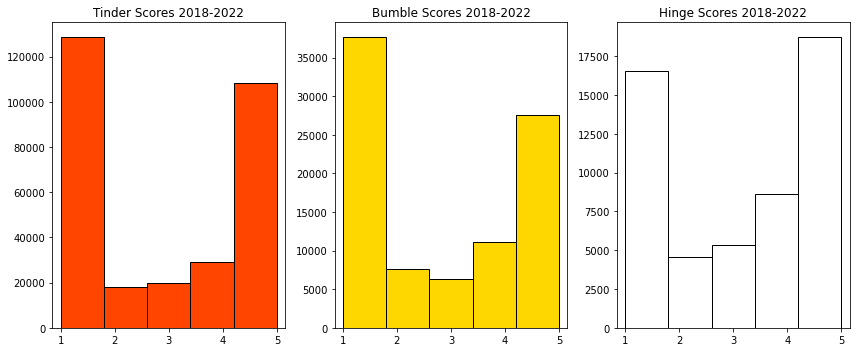

In [25]:
#plots the apps ratings during the clipped years 2018-2022
fig, axs = plt.subplots(1, 3, tight_layout=True, sharey=False, 
                        figsize = (12,5))
                       #title = 'Star Ratings for Tinder, Bumble, and Hinge')

#ax.set_xlim(1,5)
#ax.set_xticks([1,2,3,4,5])

axs[0].hist(df_T['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[0].title.set_text('Tinder Scores 2018-2022')
axs[0].set_xlim(0.85,5.15)
axs[0].set_xticks([1,2,3,4,5])

axs[1].hist(df_B['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[1].title.set_text('Bumble Scores 2018-2022')
axs[1].set_xlim(0.85,5.15)
axs[1].set_xticks([1,2,3,4,5])

axs[2].hist(df_H['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[2].title.set_text('Hinge Scores 2018-2022')
axs[2].set_xlim(0.85,5.15)
axs[2].set_xticks([1,2,3,4,5])

### What do the distributions look like pre-pandemic in recent time (Jan 2018 - Dec 2019)

In [32]:
#Clips the reviews from Jan 2018 - Dec 2019
df_TPP1 = dfT.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
df_BPP1 = dfB.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
df_HPP1 = dfH.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]

df_TPP = df_TPP1.loc[dfT['time_stamp'] <= np.datetime64('2019-12-22 00:00:00+00:00')]
df_BPP = df_BPP1.loc[dfB['time_stamp'] <= np.datetime64('2019-12-22 00:00:00+00:00')]
df_HPP = df_HPP1.loc[dfH['time_stamp'] <= np.datetime64('2019-12-22 00:00:00+00:00')]

C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2105310017.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_TPP1 = dfT.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2105310017.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_BPP1 = dfB.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2105310017.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_HPP1 = dfH.loc[dfT['time_stamp'] >= np.datetime64('2018-01-01 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2105310017.py:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_TPP = df_TPP1.loc[dfT['time_stamp'] <= np.dateti

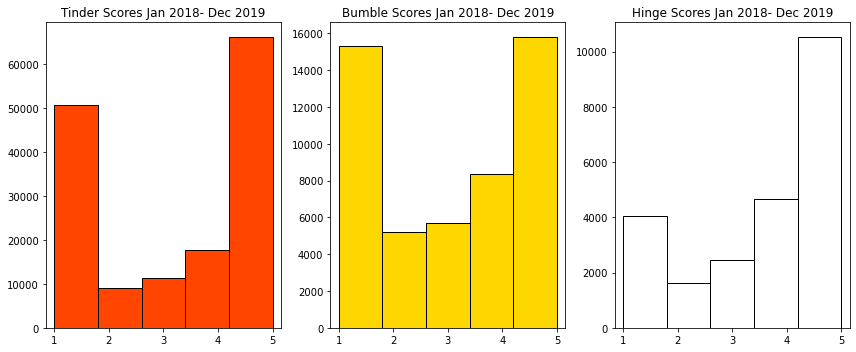

In [35]:
#plots the apps ratings during the clipped Jan 2018 to 
fig, axs = plt.subplots(1, 3, tight_layout=True, sharey=False, 
                        figsize = (12,5))
                       #title = 'Star Ratings for Tinder, Bumble, and Hinge')

#ax.set_xlim(1,5)
#ax.set_xticks([1,2,3,4,5])

axs[0].hist(df_TPP['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[0].title.set_text('Tinder Scores Jan 2018- Dec 2019')
axs[0].set_xlim(0.85,5.15)
axs[0].set_xticks([1,2,3,4,5])

axs[1].hist(df_BPP['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[1].title.set_text('Bumble Scores Jan 2018- Dec 2019')
axs[1].set_xlim(0.85,5.15)
axs[1].set_xticks([1,2,3,4,5])

axs[2].hist(df_HPP['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[2].title.set_text('Hinge Scores Jan 2018- Dec 2019')
axs[2].set_xlim(0.85,5.15)
axs[2].set_xticks([1,2,3,4,5])

### Do we see any immediate changes in the distribution of ratings when we clip to just during the pandemic (Dec 2019 - March 2021)?

In [19]:
#clips the df_'s into just the reviews from Dec 2019- March 2021
df_TD1 = df_T.loc[dfT['time_stamp'] <= np.datetime64('2021-03-08 00:00:00+00:00')]
df_BD1 = df_B.loc[dfB['time_stamp'] <= np.datetime64('2021-03-08 00:00:00+00:00')]
df_HD1 = df_H.loc[dfH['time_stamp'] <= np.datetime64('2021-03-08 00:00:00+00:00')]

df_TD = df_TD1.loc[dfT['time_stamp'] >= np.datetime64('2019-12-20 00:00:00+00:00')]
df_BD = df_BD1.loc[dfB['time_stamp'] >= np.datetime64('2019-12-20 00:00:00+00:00')]
df_HD = df_HD1.loc[dfH['time_stamp'] >= np.datetime64('2019-12-20 00:00:00+00:00')]

C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\83309941.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_TD1 = df_T.loc[dfT['time_stamp'] <= np.datetime64('2021-03-08 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\83309941.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_BD1 = df_B.loc[dfB['time_stamp'] <= np.datetime64('2021-03-08 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\83309941.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_HD1 = df_H.loc[dfH['time_stamp'] <= np.datetime64('2021-03-08 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\83309941.py:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_TD = df_TD1.loc[dfT['time_stamp'] >= np.datetime64('2019

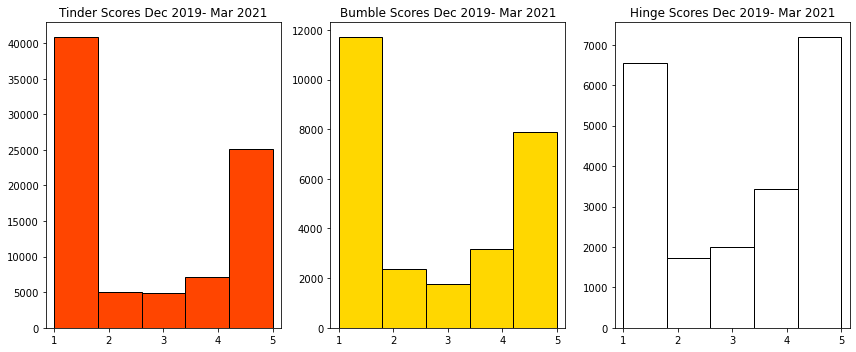

In [26]:
#plots the apps ratings during the clipped years 2018-2022
fig, axs = plt.subplots(1, 3, tight_layout=True, sharey=False, 
                        figsize = (12,5))
                       #title = 'Star Ratings for Tinder, Bumble, and Hinge')

#ax.set_xlim(1,5)
#ax.set_xticks([1,2,3,4,5])

axs[0].hist(df_TD['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[0].title.set_text('Tinder Scores Dec 2019- Mar 2021')
axs[0].set_xlim(0.85,5.15)
axs[0].set_xticks([1,2,3,4,5])

axs[1].hist(df_BD['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[1].title.set_text('Bumble Scores Dec 2019- Mar 2021')
axs[1].set_xlim(0.85,5.15)
axs[1].set_xticks([1,2,3,4,5])

axs[2].hist(df_HD['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[2].title.set_text('Hinge Scores Dec 2019- Mar 2021')
axs[2].set_xlim(0.85,5.15)
axs[2].set_xticks([1,2,3,4,5])

### Hinge took a pretty big dip after the pandemic ended (see line graphs below). Let's take a look at the distributions of each of the apps after the pandemic and see how they faired

In [9]:
#clips the df's into just the reviews from March 03 08 (day US hits 100 million vaccine doses 
#and things largely start to open back up)
df_TP = dfT.loc[dfT['time_stamp'] >= np.datetime64('2021-03-08 00:00:00+00:00')]
df_BP = dfB.loc[dfB['time_stamp'] >= np.datetime64('2021-03-08 00:00:00+00:00')]
df_HP = dfH.loc[dfH['time_stamp'] >= np.datetime64('2021-03-08 00:00:00+00:00')]

C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2078706019.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_TP = dfT.loc[dfT['time_stamp'] >= np.datetime64('2021-03-08 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2078706019.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_BP = dfB.loc[dfB['time_stamp'] >= np.datetime64('2021-03-08 00:00:00+00:00')]
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\2078706019.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df_HP = dfH.loc[dfH['time_stamp'] >= np.datetime64('2021-03-08 00:00:00+00:00')]


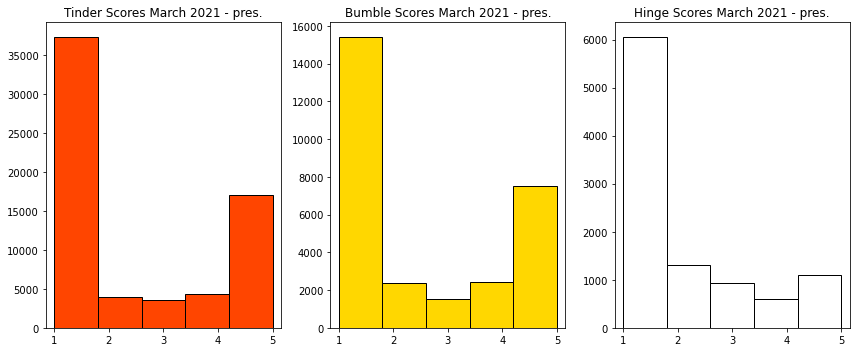

In [27]:
#post pandemic graphs
fig, axs = plt.subplots(1, 3, tight_layout=True, sharey=False, 
                        figsize = (12,5))
                       #title = 'Star Ratings for Tinder, Bumble, and Hinge')

#ax.set_xlim(1,5)
#ax.set_xticks([1,2,3,4,5])

axs[0].hist(df_TP['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[0].title.set_text('Tinder Scores March 2021 - pres.')
axs[0].set_xlim(0.85,5.15)
axs[0].set_xticks([1,2,3,4,5])

axs[1].hist(df_BP['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[1].title.set_text('Bumble Scores March 2021 - pres.')
axs[1].set_xlim(0.85,5.15)
axs[1].set_xticks([1,2,3,4,5])

axs[2].hist(df_HP['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[2].title.set_text('Hinge Scores March 2021 - pres.')
axs[2].set_xlim(0.85,5.15)
axs[2].set_xticks([1,2,3,4,5])

### Plotting all the distributions next to one another

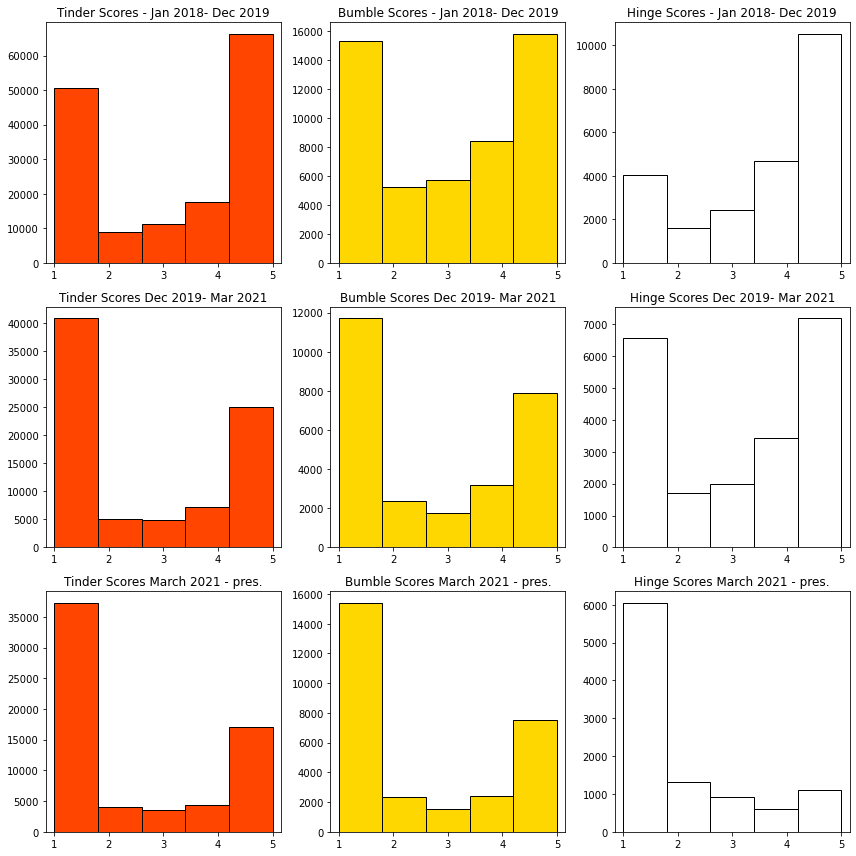

In [36]:
#plots the overall scores of the three apps over their lifespans
fig, axs = plt.subplots(3, 3, tight_layout=True, sharey=False, 
                        figsize = (12,12))
                       #title = 'Star Ratings for Tinder, Bumble, and Hinge')

#ax.set_xlim(1,5)
#ax.set_xticks([1,2,3,4,5])
axs[0,0].hist(df_TPP['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[0,0].title.set_text('Tinder Scores - Jan 2018- Dec 2019')
axs[0,0].set_xlim(0.85,5.15)
axs[0,0].set_xticks([1,2,3,4,5])

axs[0,1].hist(df_BPP['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[0,1].title.set_text('Bumble Scores - Jan 2018- Dec 2019')
axs[0,1].set_xlim(0.85,5.15)
axs[0,1].set_xticks([1,2,3,4,5])

axs[0,2].hist(df_HPP['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[0,2].title.set_text('Hinge Scores - Jan 2018- Dec 2019')
axs[0,2].set_xlim(0.85,5.15)
axs[0,2].set_xticks([1,2,3,4,5])

axs[1,0].hist(df_TD['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[1,0].title.set_text('Tinder Scores Dec 2019- Mar 2021')
axs[1,0].set_xlim(0.85,5.15)
axs[1,0].set_xticks([1,2,3,4,5])

axs[1,1].hist(df_BD['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[1,1].title.set_text('Bumble Scores Dec 2019- Mar 2021')
axs[1,1].set_xlim(0.85,5.15)
axs[1,1].set_xticks([1,2,3,4,5])

axs[1,2].hist(df_HD['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[1,2].title.set_text('Hinge Scores Dec 2019- Mar 2021')
axs[1,2].set_xlim(0.85,5.15)
axs[1,2].set_xticks([1,2,3,4,5])

axs[2,0].hist(df_TP['score'], bins = 5, color = "orangered", edgecolor = 'black')
axs[2,0].title.set_text('Tinder Scores March 2021 - pres.')
axs[2,0].set_xlim(0.85,5.15)
axs[2,0].set_xticks([1,2,3,4,5])

axs[2,1].hist(df_BP['score'], bins = 5, color = 'gold', edgecolor = 'black')
axs[2,1].title.set_text('Bumble Scores March 2021 - pres.')
axs[2,1].set_xlim(0.85,5.15)
axs[2,1].set_xticks([1,2,3,4,5])

axs[2,2].hist(df_HP['score'], bins = 5, color = 'white', edgecolor = 'black')
axs[2,2].title.set_text('Hinge Scores March 2021 - pres.')
axs[2,2].set_xlim(0.85,5.15)
axs[2,2].set_xticks([1,2,3,4,5])

#### Holy crap all three apps take a nosedive post pandemic

#### worth noting that a majority of Hinge's reviews come after 2018 when the app was "relaunched" despite existing since 2012 according to Wikipedia

### How does the quantity of reviews change over time? 

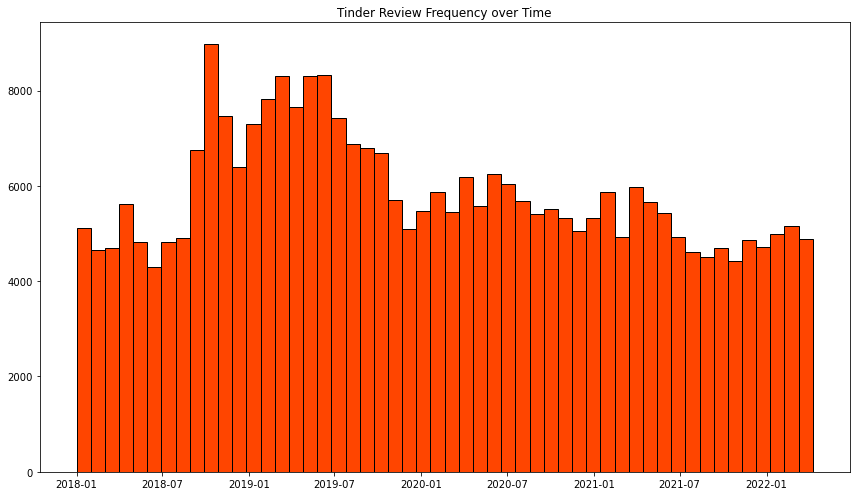

In [65]:
fig, axs = plt.subplots(1, 1, tight_layout=True, sharey=False, 
                        figsize = (12,7))

axs.hist(df_T['date'], bins = 52, color = "orangered", edgecolor = 'black')
axs.title.set_text('Tinder Review Frequency over Time')

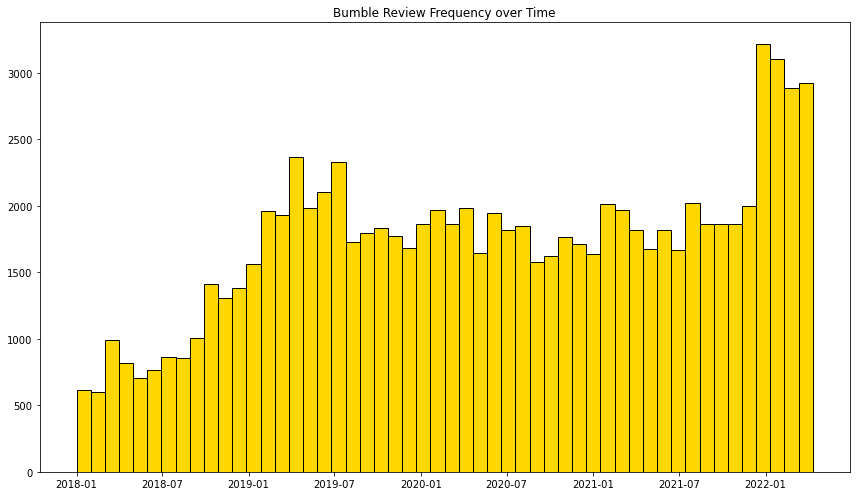

In [66]:
fig, axs = plt.subplots(1, 1, tight_layout=True, sharey=False, 
                        figsize = (12,7))

axs.hist(df_B['date'], bins = 52, color = 'gold', edgecolor = 'black')
axs.title.set_text('Bumble Review Frequency over Time')

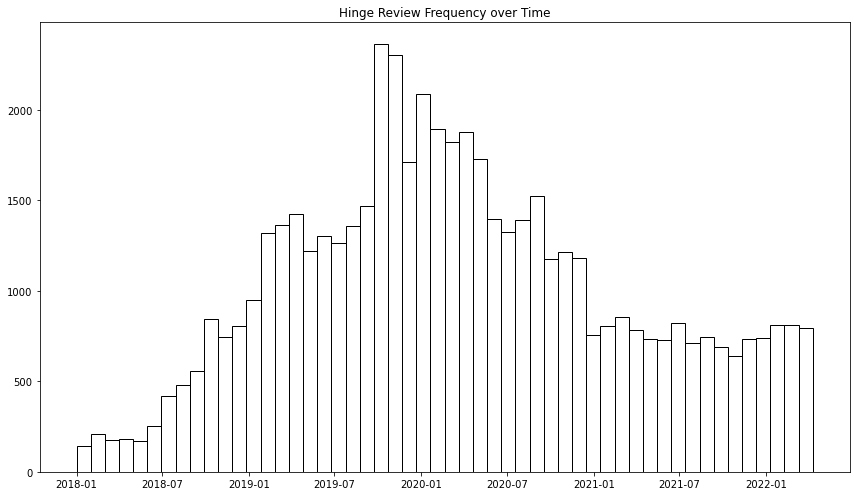

In [67]:
fig, axs = plt.subplots(1, 1, tight_layout=True, sharey=False, 
                        figsize = (12,7))

axs.hist(df_H['date'], bins = 52, color = 'white', edgecolor = 'black')
axs.title.set_text('Hinge Review Frequency over Time')

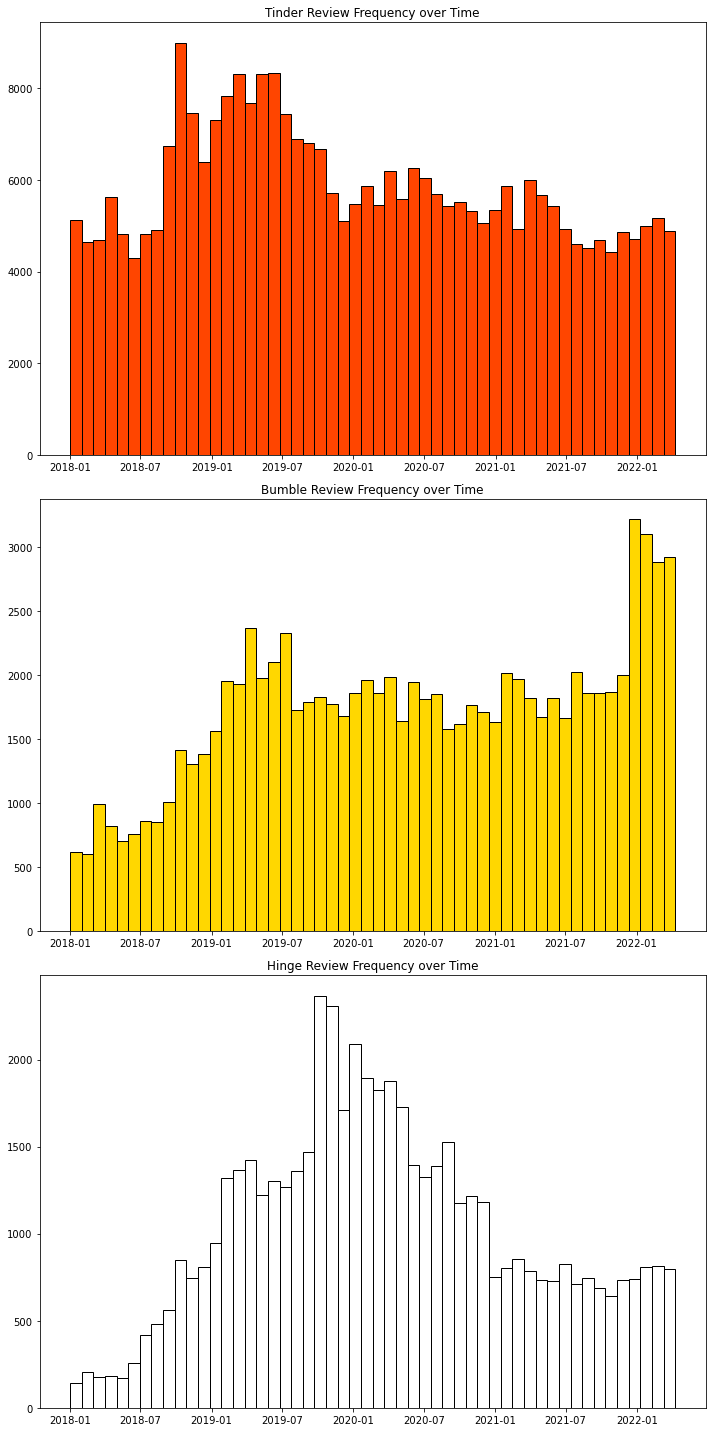

In [70]:
fig, axs = plt.subplots(3, 1, tight_layout=True, sharey=False, 
                        figsize = (10,20))

axs[0].hist(df_T['date'], bins = 52, color = "orangered", edgecolor = 'black')
axs[0].title.set_text('Tinder Review Frequency over Time')

axs[1].hist(df_B['date'], bins = 52, color = 'gold', edgecolor = 'black')
axs[1].title.set_text('Bumble Review Frequency over Time')

axs[2].hist(df_H['date'], bins = 52, color = 'white', edgecolor = 'black')
axs[2].title.set_text('Hinge Review Frequency over Time')

#df_T['date'].hist(bins = 52, grid = False, figsize= (12,7), color = "orangered", edgecolor = 'black')

#### Bumble Rewiew Frequency 

C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\1360324767.py:22: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  axs[0].set_xlim(np.datetime64("2017-12-15 00:00:00+00:00"), np.datetime64("2022-04-20 00:00:00+00:00"))
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\1360324767.py:30: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  axs[1].set_xlim(np.datetime64("2017-12-15 00:00:00+00:00"), np.datetime64("2022-04-20 00:00:00+00:00"))
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\1360324767.py:38: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  axs[2].set_xlim(np.datetime64("2017-12-15 00:00:00+00:00"), np.datetime64("2022-04-20 00:00:00+00:00"))
C:\Users\Alex\AppData\Local\Temp\ipykernel_17984\1360324767.py:43: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error 

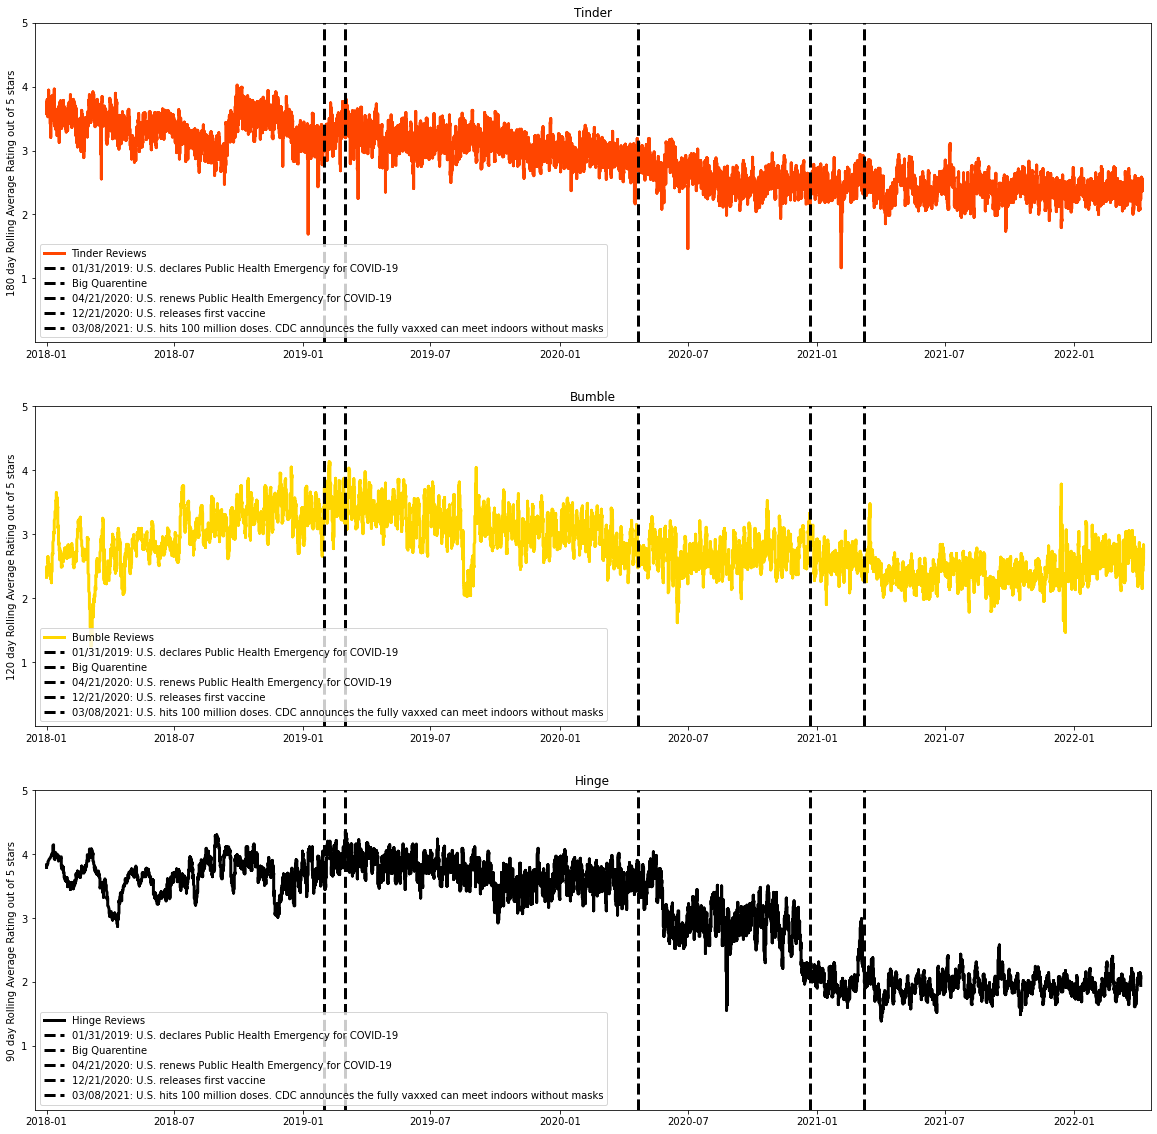

In [18]:
#plots a rolling average of the review scores for each app over time

xT = df_T['date']
yT = df_T['score'].rolling(180).mean()

xB = df_B['date']
yB = df_B['score'].rolling(120).mean()

xH = df_H['date']
yH = df_H['score'].rolling(90).mean()

fig, axs = plt.subplots(3, 1, tight_layout=False, 
                        sharey=True, sharex = False,
                        figsize = (20,20))

#tinder
axs[0].plot_date(xT,yT, fmt='-', label="Tinder Reviews",lw=3, color = 'orangered')
axs[0].title.set_text('Tinder')
axs[0].set_ylabel("180 day Rolling Average Rating out of 5 stars")
axs[0].set_ylim(0,5)
axs[0].set_yticks([1,2,3,4,5])
axs[0].set_xlim(np.datetime64("2017-12-15 00:00:00+00:00"), np.datetime64("2022-04-20 00:00:00+00:00"))

#bumble
axs[1].plot_date(xB,yB, fmt='-', label="Bumble Reviews",lw=3, color = 'gold')
axs[1].title.set_text('Bumble')
axs[1].set_ylabel("120 day Rolling Average Rating out of 5 stars")
axs[1].set_ylim(0,5)
axs[1].set_yticks([1,2,3,4,5])
axs[1].set_xlim(np.datetime64("2017-12-15 00:00:00+00:00"), np.datetime64("2022-04-20 00:00:00+00:00"))

#Hinge
axs[2].plot_date(xH,yH, fmt='-', label="Hinge Reviews",lw=3, color = 'black')
axs[2].title.set_text('Hinge')
axs[2].set_ylabel("90 day Rolling Average Rating out of 5 stars")
axs[2].set_ylim(0,5)
axs[2].set_yticks([1,2,3,4,5])
axs[2].set_xlim(np.datetime64("2017-12-15 00:00:00+00:00"), np.datetime64("2022-04-20 00:00:00+00:00"))

#important dates 

#vertical lines dates
x1 = np.datetime64("2019-01-31 00:00:00+00:00")
q = np.datetime64("2019-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")
#x5 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
axs[0].vlines(x1, 0, 80, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
axs[1].vlines(x1, 0, 80, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
axs[2].vlines(x1, 0, 80, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarentine 
axs[0].vlines(q, 0, 80, colors='black', label="Big Quarentine",lw=3, 
              linestyles='dashed')
axs[1].vlines(q, 0, 80, colors='black', label="Big Quarentine",lw=3, 
              linestyles='dashed')
axs[2].vlines(q, 0, 80, colors='black', label="Big Quarentine",lw=3, 
              linestyles='dashed')

#renewed emergency call
axs[0].vlines(x2, 0, 80, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
axs[1].vlines(x2, 0, 80, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
axs[2].vlines(x2, 0, 80, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
axs[0].vlines(x3, 0, 80, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
axs[1].vlines(x3, 0, 80, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
axs[2].vlines(x3, 0, 80, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
axs[0].vlines(x4, 0, 80, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
axs[1].vlines(x4, 0, 80, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
axs[2].vlines(x4, 0, 80, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')


axs[0].legend(loc="lower left")
axs[1].legend(loc="lower left")
axs[2].legend(loc="lower left")
plt.show()

Now let's see how the quantity of review changed over time 

### Now let's examine the most common words that reviewers mention

In [13]:
#verification, must be run each time the kernel is restarted
import nltk
nltk.download('stopwords')
stopwords.words('english');
from nltk.corpus import stopwords;
stopwords.words('english');
print (stopwords.words('english'));

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#gathers all of those sweet sweet words
def getWords(df):
    #throws the copy error warning because it annoys me
    pd.options.mode.chained_assignment = None  # default='warn'
    
    #removes stopwords and stores data in new df.words using input from input df['full text']
    #drops all rows where they did not leave a review comment 
    df = df.dropna(subset = ['clean_text'])
    
    sw_list = stopwords.words('english') + ['amp',''," "]
    #split into words
    df['words'] = [x.split(" ") for x in df['clean_text']]
    #take out stopwords
    df['words'] = [list(set(x) - set(sw_list)) for x in df['words']]

    df1 = df[['clean_text', 'words']]
    
    return df1

In [15]:
#TOP 10 MOST COMMON REVIEW WORDS FOR TINDER
#drops the NaN's from the clean text 
df_TW = getWords(df_T)

vct = CountVectorizer(stop_words="english")
X = vct.fit_transform(list(df_TW['clean_text']))
word_counts = pd.DataFrame(X.sum(axis=0))
word_counts.columns = vct.get_feature_names()
# Note that these are in-place operations.
word_counts = word_counts.T #transpose to turn 1D row into 1D column
word_counts = word_counts[0].sort_values(ascending=False)

words =  list(word_counts.index)
#removes omitted words  # Note that these are in-place operations.
words.remove('tinder')
words.remove('app')
words.remove('people')
words.remove('just')
words.remove('dont')
words.remove('got')
words.remove('apps')
words.remove('im')
words.remove('ive')

# This works because the indices are labeled this way!
word_counts = word_counts.loc[words]
word_counts.head(10)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


good       38317
banned     25188
account    24611
like       21488
time       18015
money      17126
matches    16409
great      15893
nice       15358
pay        14319
Name: 0, dtype: int64

In [16]:
#TOP 10 MOST COMMON REVIEW WORDS FOR BUMBLE
#drops the NaN's from the clean text 
df_BW = getWords(df_B)

vct = CountVectorizer(stop_words="english")
X = vct.fit_transform(list(df_BW['clean_text']))
word_counts = pd.DataFrame(X.sum(axis=0))
word_counts.columns = vct.get_feature_names()
# Note that these are in-place operations.
word_counts = word_counts.T #transpose to turn 1D row into 1D column
word_counts = word_counts[0].sort_values(ascending=False)

words =  list(word_counts.index)
#removes omitted words  # Note that these are in-place operations.
words.remove('bumble')
words.remove('app')
words.remove('people')
words.remove('just')
words.remove('dont')
words.remove('got')
words.remove('apps')
words.remove('im')
words.remove('ive')

# This works because the indices are labeled this way!
word_counts = word_counts.loc[words]
word_counts.head(10)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


good       11674
like       11242
matches     8127
time        7759
great       7518
dating      7237
pay         6662
match       6395
use         6351
women       6220
Name: 0, dtype: int64

In [17]:
#TOP 10 MOST COMMON REVIEW WORDS FOR HINGE
#drops the NaN's from the clean text 
df_HW = getWords(df_H)

vct = CountVectorizer(stop_words="english")
X = vct.fit_transform(list(df_HW['clean_text']))
word_counts = pd.DataFrame(X.sum(axis=0))
word_counts.columns = vct.get_feature_names()
# Note that these are in-place operations.
word_counts = word_counts.T #transpose to turn 1D row into 1D column
word_counts = word_counts[0].sort_values(ascending=False)

words =  list(word_counts.index)
#removes omitted words  # Note that these are in-place operations.
words.remove('hinge')
words.remove('app')
words.remove('people')
words.remove('just')
words.remove('dont')
words.remove('got')
words.remove('apps')
words.remove('im')
words.remove('ive')

# This works because the indices are labeled this way!
word_counts = word_counts.loc[words]
word_counts.head(10)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


like        8605
good        8250
dating      6826
great       4808
better      4084
far         3951
matches     3447
profiles    3439
use         3353
profile     3278
Name: 0, dtype: int64